# Movies Dataset

# •Import packages and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as yp

from matplotlib import rcParams            
rcParams['figure.figsize'] = (8,6)
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

sns.set_style('darkgrid')
sns.set_palette('crest_r')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')
df

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9822,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9823,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9824,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9825,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


# EDA Questions : 
1-What is the top five years of making films ?

2-What is the most popular movie?

3- What is the top rated movie ?

4-What is the top 3 genre ? 

5- What is the most frequent genre for highest votes movies ?

6- What is correlation between 'Genre' and 'Popularity' ? & What is the effect of only using (highest vote average) ?

7- What is most frequent language ? & What is the effect of only using (highest vote average) ?

# •Show some general properties for the data

In [8]:
df.shape

(9827, 9)

In [9]:
df = df.drop(['Overview', 'Poster_Url'], axis = 1)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,6.3,en,Thriller
3,2021-11-24,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War"


In [5]:
profile = yp.ProfileReport(df,title = 'My Data')
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

array([[<AxesSubplot:title={'center':'Popularity'}>,
        <AxesSubplot:title={'center':'Vote_Count'}>],
       [<AxesSubplot:title={'center':'Vote_Average'}>, <AxesSubplot:>]],
      dtype=object)

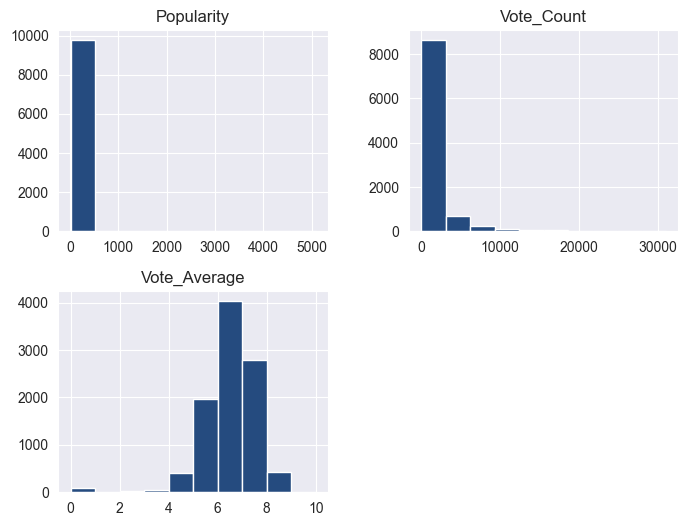

In [6]:
df.hist()

In [22]:
df.dtypes

Release_Date          object
Title                 object
Popularity           float64
Vote_Count             int64
Vote_Average         float64
Original_Language     object
Genre                 object
dtype: object

In [10]:
df['Release_Date'] = pd.to_datetime(df['Release_Date']).dt.year

In [9]:
df['Release_Date'].nunique()

102

# 1-What is the top five years of making films ?

In [10]:
df['Release_Date'].value_counts().head()

2021    714
2018    530
2017    510
2019    500
2016    470
Name: Release_Date, dtype: int64

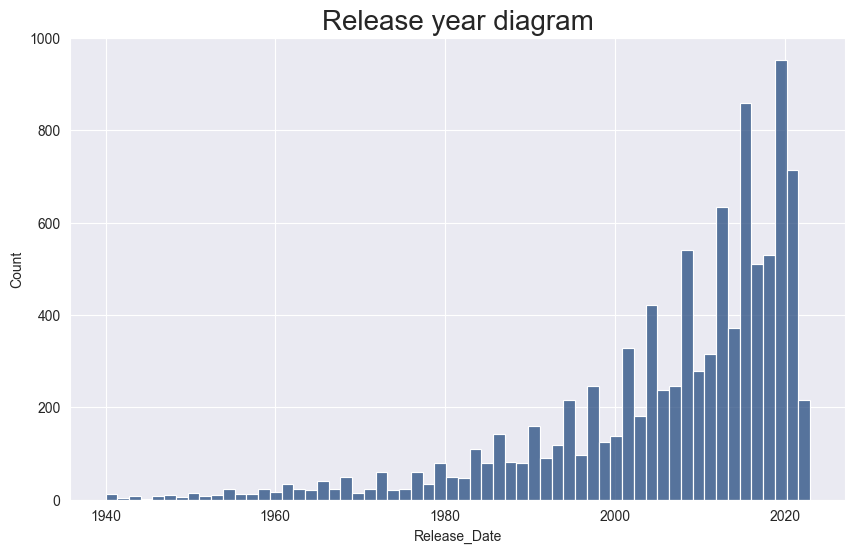

In [36]:
fig, ax = plt.subplots(figsize = (10,6))
sns.histplot(x = 'Release_Date', bins = 60, binrange = (1940, 2023), data = df, ax = ax)
plt.title('Release year diagram', fontsize = 20)
plt.show()

# I found histogram hides some details, so i decided to draw another plot which is line plot

In [12]:
dff = pd.DataFrame(df['Release_Date'].value_counts().reset_index().values, columns = ['year', 'movies_per_year'])

In [60]:
dff = dff.sort_values(by = 'year')

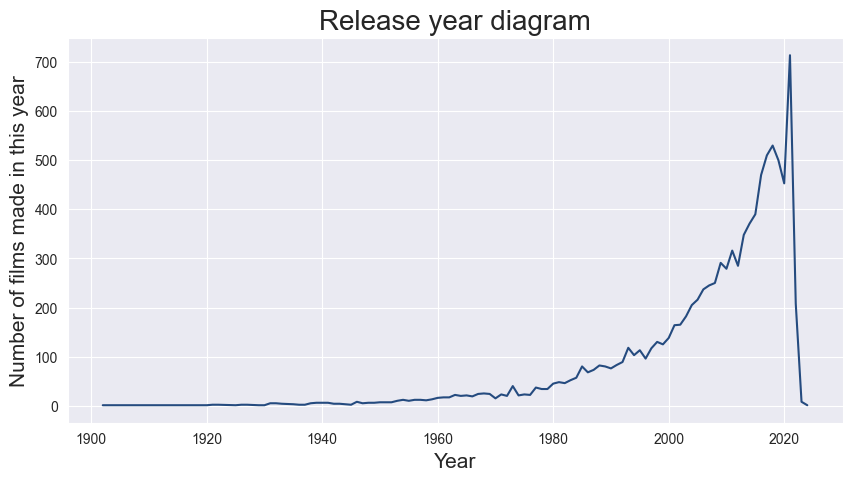

In [14]:
fig, ax = plt.subplots(figsize = (10,5))
ax.plot(dff['year'], dff['movies_per_year'])
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Number of films made in this year', fontsize = 15)
plt.title('Release year diagram', fontsize = 20)
plt.show()

# 2-What is the most popular movie?

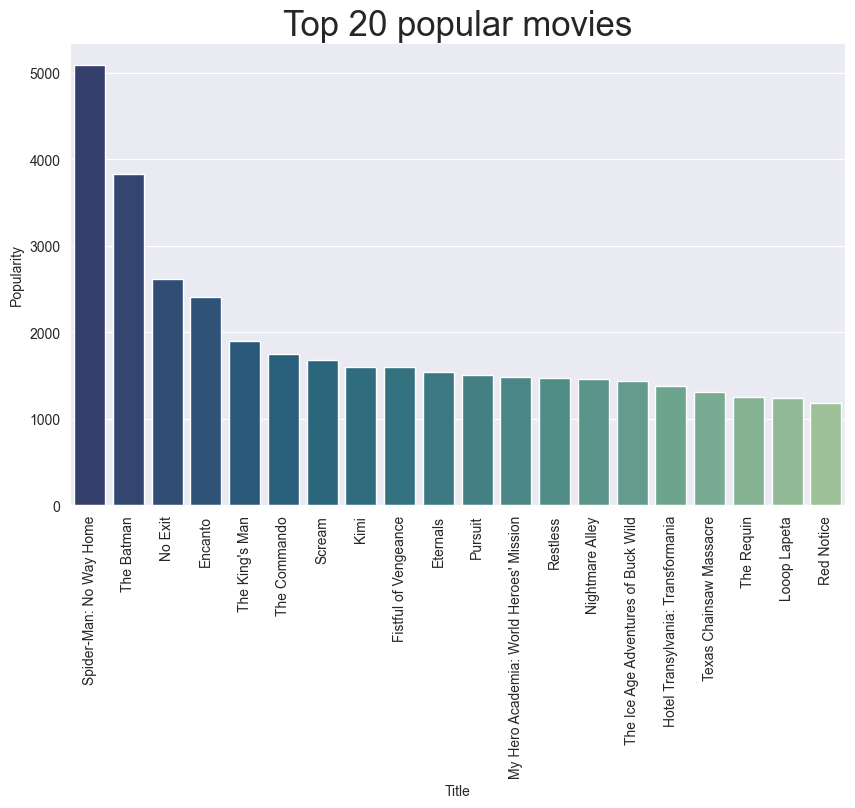

In [6]:
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(x = 'Title', y = 'Popularity', data = df.sort_values(by = 'Popularity', ascending = False).head(20), ax = ax, palette = 'crest_r')
plt.title('Top 20 popular movies', fontsize = 25)
plt.xticks(rotation = 90, fontsize = 10)
plt.show()

# 3- What is the top rated movie ?

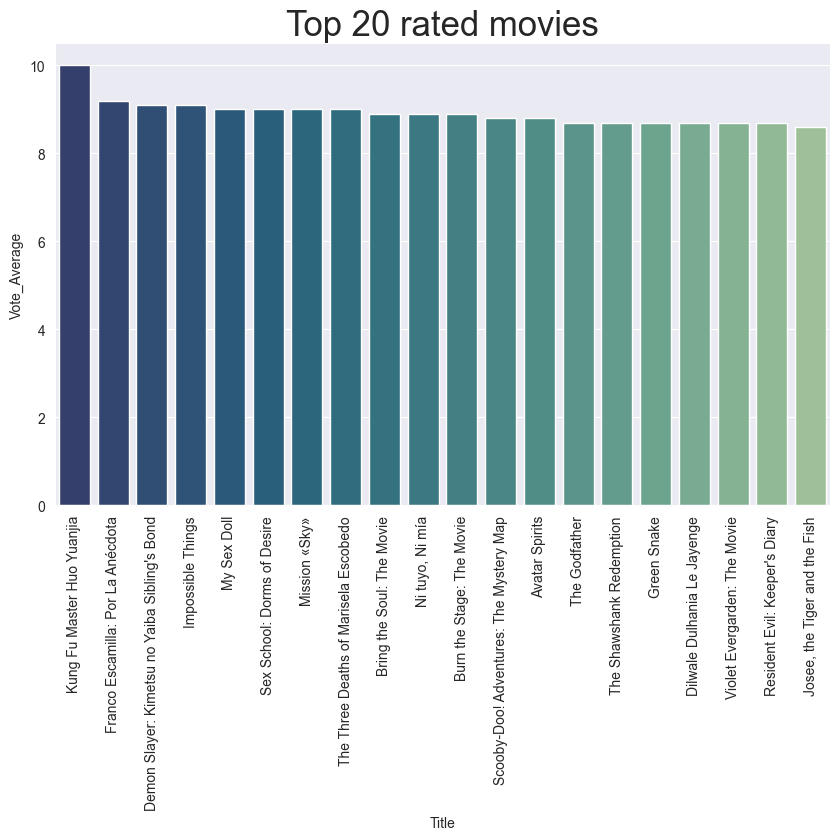

In [24]:
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(x = 'Title', y = 'Vote_Average', data = df.sort_values(by = 'Vote_Average', ascending = False).head(20), ax = ax, palette = 'crest_r')
plt.xticks(rotation = 90, fontsize = 10)
plt.title('Top 20 rated movies', fontsize = 25)
plt.show()

# 4-What is the top 3 genre ? 

In [17]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

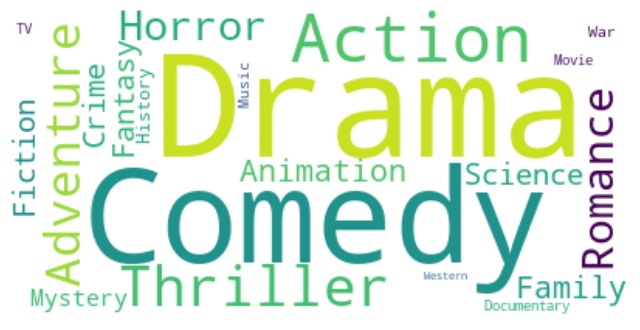

In [18]:
col = df['Genre']
text = " ".join(cat for cat in col)

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

plt.axis("off")
plt.imshow(word_cloud, interpolation='bilinear')
plt.show()

# Although reading top three genre is clear, I will try to find another way to rearrange the column 'Genre'

In [19]:
df1 = df.copy()
df1['Genre'] = df1['Genre'].str.split(', ')
df1 = df1.explode('Genre')
df1.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,Action
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,Adventure
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,Science Fiction
1,2022,The Batman,3827.658,1151,8.1,en,Crime
1,2022,The Batman,3827.658,1151,8.1,en,Mystery


In [20]:
df1['Genre'].nunique()

19

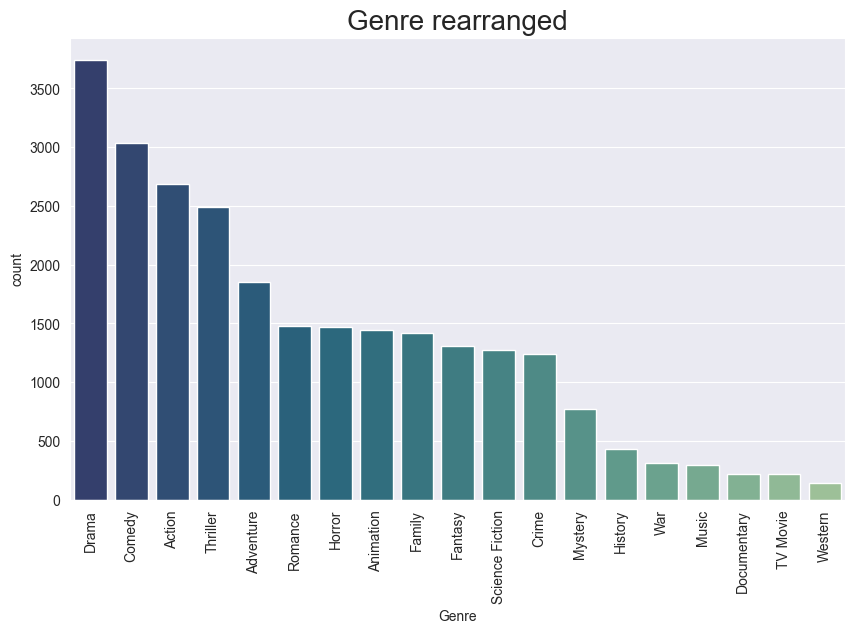

In [21]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x = 'Genre', data = df1, order = df1['Genre'].value_counts().index, palette = 'crest_r', ax = ax)
plt.xticks(rotation = 90)
plt.title('Genre rearranged', fontsize = 20)
plt.show()

# In next step, I will try to pick the region with the highest vote average and do analysis on it :>

In [20]:
labels = ['low', 'medium', 'high']
df1['Vote_Average_New'] = pd.qcut(df1['Vote_Average'], q = 3, labels = labels)
df1.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Vote_Average_New
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,Action,high
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,Adventure,high
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,Science Fiction,high
1,2022,The Batman,3827.658,1151,8.1,en,Crime,high
1,2022,The Batman,3827.658,1151,8.1,en,Mystery,high


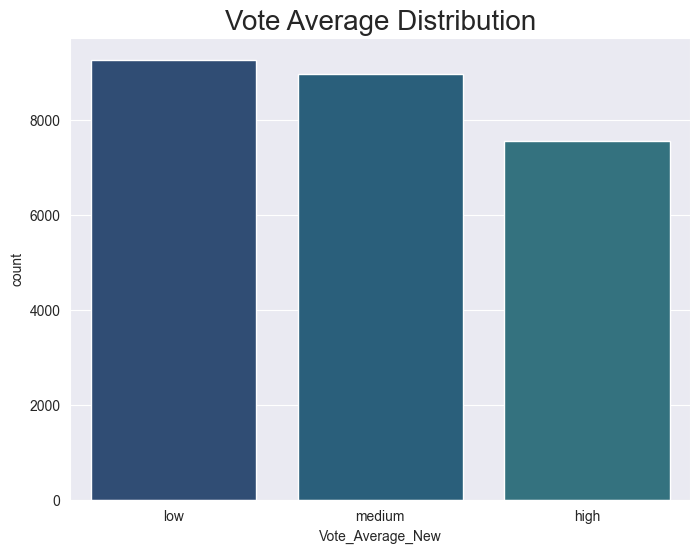

In [35]:
sns.countplot(x = 'Vote_Average_New', data = df1)
plt.title('Vote Average Distribution', fontsize = 20)
plt.show()

In [21]:
highestvotes = df1[df1['Vote_Average_New'] == 'high'] 
highestvotes.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Vote_Average_New
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,Action,high
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,Adventure,high
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,Science Fiction,high
1,2022,The Batman,3827.658,1151,8.1,en,Crime,high
1,2022,The Batman,3827.658,1151,8.1,en,Mystery,high


# 5- What is the most frequent genre for highest votes movies ?

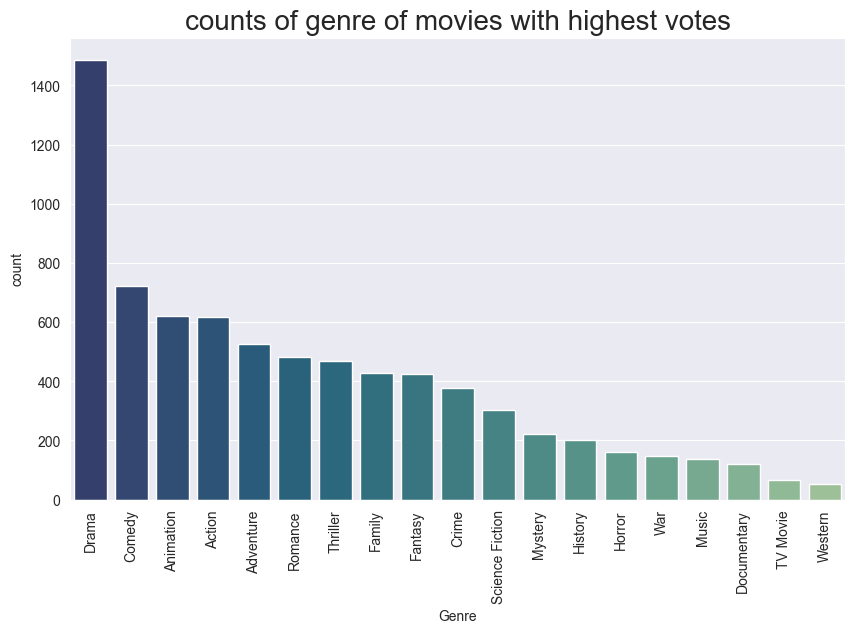

In [23]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x = 'Genre', data = highestvotes, order = highestvotes['Genre'].value_counts().index, palette = 'crest_r', ax = ax)
plt.xticks(rotation = 90, fontsize = 10)
plt.title('counts of genre of movies with highest votes', fontsize = 20)
plt.show()

# 6- What is correlation between 'Genre' and 'Popularity' ? & What is the effect of only using (highest vote average) ?

In [15]:
df1.sort_values(by = 'Genre')

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,Action
7563,1977,Smokey and the Bandit,15.855,523,6.9,en,Action
1400,2008,Tropic Thunder,52.883,4778,6.6,en,Action
1402,2014,The Last Survivors,52.818,162,6.3,en,Action
4637,1994,Street Fighter,22.168,1125,4.5,en,Action
...,...,...,...,...,...,...,...
5533,2020,First Cow,19.535,264,7.0,en,Western
9634,1971,Red Sun,13.510,166,6.9,fr,Western
447,2021,Catch the Bullet,113.256,80,5.8,en,Western
1704,1966,"The Good, the Bad and the Ugly",45.733,6479,8.5,it,Western


In [50]:
df2 = df1.copy()
df2 = df2.groupby(by = 'Genre').agg({'Popularity' : 'sum'}).reset_index().sort_values(by = 'Popularity', ascending = False)

In [52]:
df3 = highestvotes.copy()
df3 = df3.groupby(by = 'Genre').agg({'Popularity' : 'sum'}).reset_index().sort_values(by = 'Popularity', ascending = False)

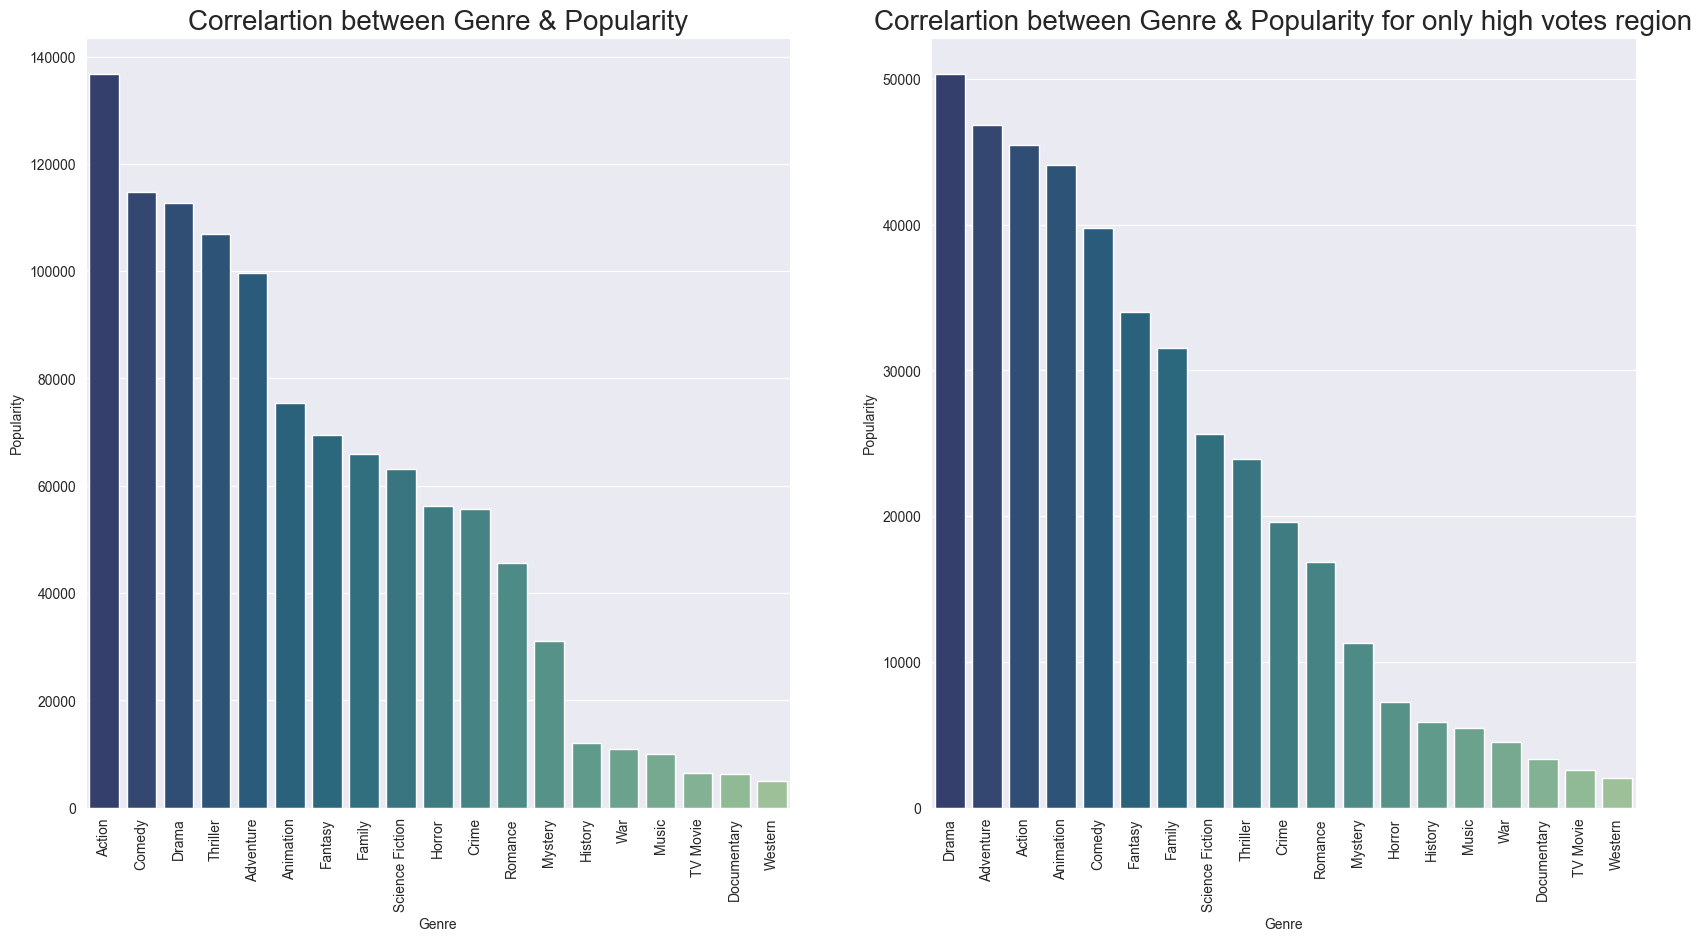

In [53]:
fig, ax = plt.subplots(1,2, figsize = (20,10))
sns.barplot(x = 'Genre', y = 'Popularity', data = df2, palette = 'crest_r', ci = None, ax = ax[0])
ax[0].set_title('Correlartion between Genre & Popularity', fontsize = 20)

sns.barplot(x = 'Genre', y = 'Popularity', data = df3, palette = 'crest_r', ci = None, ax = ax[1])
ax[1].set_title('Correlartion between Genre & Popularity for only high votes region', fontsize = 20)
ax[0].tick_params(axis = 'x', labelrotation = 90)
ax[1].tick_params(axis = 'x', labelrotation = 90)
plt.show()

# 7- What is most frequent language ? & What is the effect of only using (highest vote average) ?

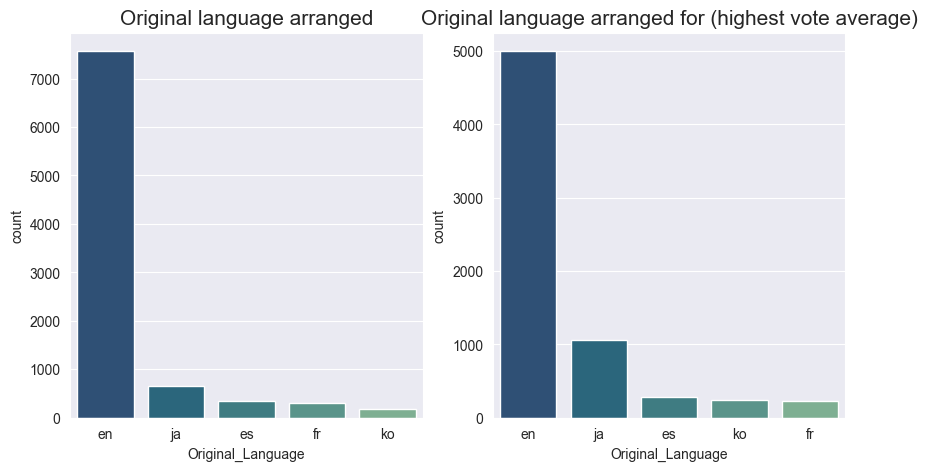

In [55]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.countplot(x = 'Original_Language', data = df, order = df['Original_Language'].value_counts().iloc[:5].index, palette = 'crest_r', ax = ax[0])
ax[0].set_title('Original language arranged', fontsize = 15)

sns.countplot(x = 'Original_Language', data = highestvotes, order = highestvotes['Original_Language'].value_counts().iloc[:5].index, palette = 'crest_r', ax = ax[1])
ax[1].set_title('Original language arranged for (highest vote average)', fontsize = 15)
plt.show()

# Conclusion
1- The top 5 years of making films were : 2021 >> 2018 >> 2017 >> 2019 >> 2016. 

2- In general making films increasing by time.

3- Top 3 popular movies are: Spider-Man: No Way Home >> The Batman >> No Exit.

4- Top 3 rated movies are: kung fu master huo yuanjia >> franco escamilla por la anécdota >> Demon Slayer: Kimetsu no Yaiba siblings bond.

5- Worse vote average is common. 

6- Most frequent genre are: Drama >> Comedy >> Action.

7- Least frequent genre are: Westerm >> TV movie >> Documentary.

8- The most frequent genre for highest votes movies are: Drama >> Comedy >> Animation.

9- The top three genre with highest popularity are Action >> Comedy >> Drama, though there are: Drama >> Adventure >> Action in the region of highest votes.

10- The top five frequent language is english >> japanese >>  spanish >> frensh >> korean, though there are 
english >> japanese >>  spanish >> korean >> frensh.